# Cifar 10 Session

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

In [3]:
from keras.models import Sequential

In [4]:
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Activation, Flatten, Dropout

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import numpy as np

In [7]:
batch_size = 32
epochs = 2
num_classes = 10

In [8]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [18]:
y_train.shape

(50000, 1)

In [19]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
x_train.shape[1:]

(32, 32, 3)

In [48]:
model = Sequential()

model.add(Conv2D(3, (3,3), padding='same', input_shape = x_train.shape[1:] ))


In [54]:
# model.get_weights()[0].shape

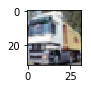

In [33]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[1])

In [34]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [35]:
image = x_train[1]

In [36]:
image = np.expand_dims(image, axis=0)

In [37]:
image.shape

(1, 32, 32, 3)

In [38]:
predicted = model.predict(image)

In [39]:
predicted.shape

(1, 32, 32, 3)

In [40]:
predicted = np.squeeze(predicted, axis = 0)

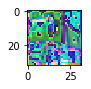

In [42]:
plt.figure(figsize=(1,1))
plt.imshow(predicted)

In [43]:
model = Sequential()

model.add(Conv2D(32, (5,5), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [44]:
opt = keras.optimizers.rmsprop(lr=0.001, decay=0.000001)

In [46]:
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [47]:
model.fit(x_train, y_train, verbose=2, epochs=epochs, validation_split=.2, batch_size=32)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
66s - loss: 1.5625 - acc: 0.4362 - val_loss: 1.2975 - val_acc: 0.5252
Epoch 2/2
61s - loss: 1.1810 - acc: 0.5844 - val_loss: 1.0986 - val_acc: 0.6159
